In [2]:
import pandas as pd 

In [3]:
df_web_data = pd.read_csv('../CSV/df_web_data_combinado.csv')
df_experiment_clients = pd.read_csv('../CSV/df_final_experiment_clients.csv')
df_demo = pd.read_csv('../CSV/df_final_demo.csv')

In [5]:
df_web_data.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [6]:
df_experiment_clients.columns

Index(['client_id', 'Variation'], dtype='object')

In [18]:
print(df_web_data['process_step'].unique())

['step_3' 'step_2' 'step_1' 'start' 'confirm']


In [19]:
steps_data = df_web_data.groupby('process_step')['client_id'].nunique().reset_index()
steps_data.columns = ['process_step', 'unique_clients']
print(steps_data)

  process_step  unique_clients
0      confirm           81145
1        start          118980
2       step_1          104978
3       step_2           96943
4       step_3           91076


In [20]:
steps_data['abandon_rate'] = steps_data['unique_clients'].pct_change(periods=-1) * -100
print(steps_data)

  process_step  unique_clients  abandon_rate
0      confirm           81145     31.799462
1        start          118980    -13.338033
2       step_1          104978     -8.288376
3       step_2           96943     -6.441873
4       step_3           91076           NaN


In [21]:
df_merged = df_web_data.merge(df_experiment_clients, on='client_id', how='left')

In [23]:
steps_experiment = df_merged.groupby(['process_step', 'Variation'])['client_id'].nunique().reset_index()
steps_experiment = steps_experiment.pivot(index='process_step', columns='Variation', values='client_id')
steps_experiment['abandon_rate_control'] = steps_experiment['Control'].pct_change(periods=-1) * -100
steps_experiment['abandon_rate_test'] = steps_experiment['Test'].pct_change(periods=-1) * -100
print(steps_experiment)

Variation     Control   Test  abandon_rate_control  abandon_rate_test
process_step                                                         
confirm         15434  18687             34.034278          29.956145
start           23397  26679            -16.102620          -9.939424
step_1          20152  24267             -8.053619          -9.025968
step_2          18650  22258             -7.048559          -6.594512
step_3          17422  20881                   NaN                NaN


In [28]:
import matplotlib.pyplot as plt

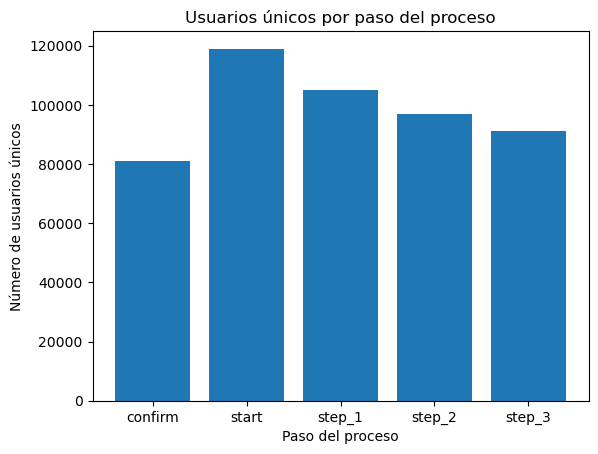

In [29]:
plt.bar(steps_data['process_step'], steps_data['unique_clients'])
plt.title("Usuarios únicos por paso del proceso")
plt.xlabel("Paso del proceso")
plt.ylabel("Número de usuarios únicos")
plt.show()

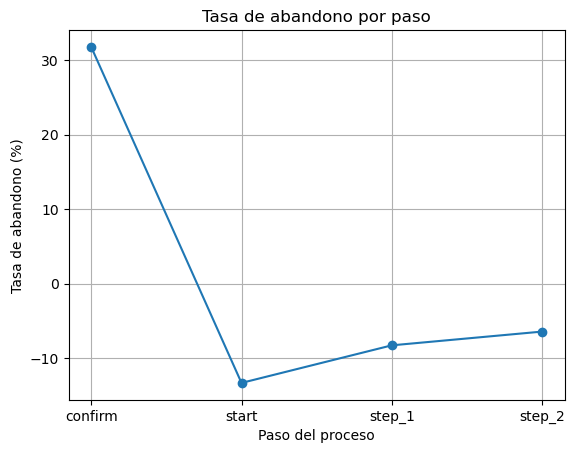

In [30]:
plt.plot(steps_data['process_step'], steps_data['abandon_rate'], marker='o')
plt.title("Tasa de abandono por paso")
plt.xlabel("Paso del proceso")
plt.ylabel("Tasa de abandono (%)")
plt.grid()
plt.show()